# Pandas와 Seaborn을 활용한 데이터 분석 및 시각화
* seaborn에서 제공하는 dataset인 "titanic"을 사용

In [1]:
# library 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data 불러오기

In [5]:
df = sns.load_dataset("titanic")
df.shape

(891, 15)

# Data 정보 확인하기

In [7]:
# dataset의 정보 확인
# 총 14개의 컬럼, 891개의 로우가 존재하며, 일부 데이터에서는 결측치가 많아 보임

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [19]:
df.sample(n=5, random_state=42)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
709,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False
439,0,2,male,31.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
840,0,3,male,20.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True
720,1,2,female,6.0,0,1,33.0000,S,Second,child,False,NaN,Southampton,yes,False
39,1,3,female,14.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False


# 결측치 확인

In [10]:
# print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

<AxesSubplot:>

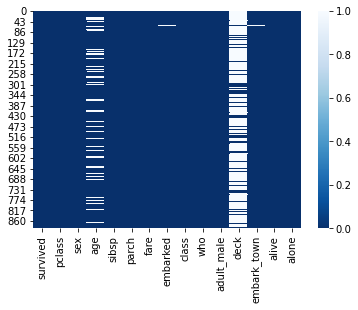

In [13]:
# 결측치 확인
# age, deck에서 굉장히 많은 결측치가 보임

sns.heatmap(data=df.isnull(), cmap="Blues_r")

In [14]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# age 컬럼의 20%, deck의 77%가 결측치

df.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

# 기술통계 확인하기

In [20]:
# 수치형 변수 확인

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# 범주형 변수 확인하기

df.describe(include="object")

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


# 수치형 변수 시각화
* seaborn -> distplot

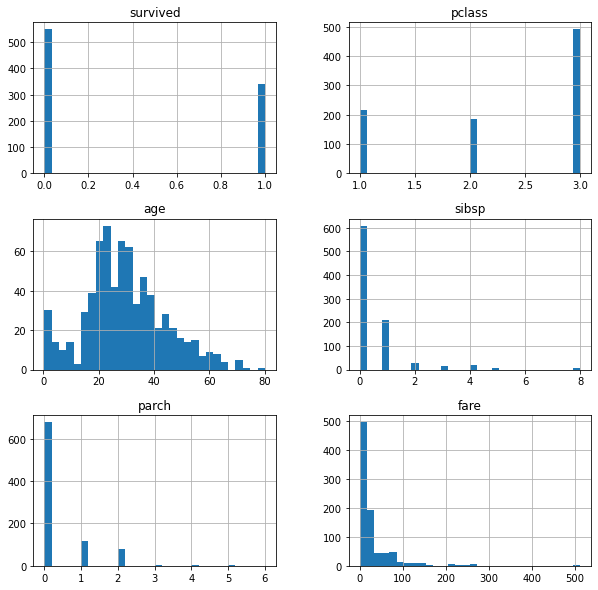

In [26]:
# pandas에서 제공하는 기본 히스토그램
# 수치형 변수에 대한 히스토그램을 그려줌
# survived, pclass, sibsp, parch 모두 범주형 데이터라고 봐야 할 것 같음
# age: 배에 승선 했던 사람들의 나이는 대부분 20~40대 사이에 분포하며, 10세 이하의 어린 아이들도 많았음

_ = df.hist(bins=30, figsize=(10, 10))

## 수치형변수 1개에 대한 시각화
* displot(distributions)
    - 기본적으로 histogram을 출력함
    - kdeplot(kernel density estimator)
    - rugplot(카페트의 털실처럼 그려짐)
    - boxplot

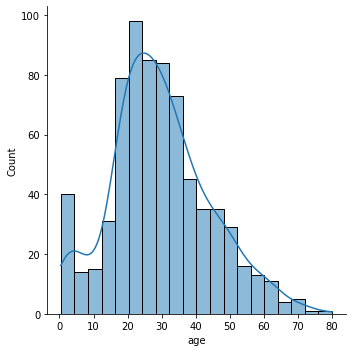

In [31]:
sns.displot(data=df, x="age", kde=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

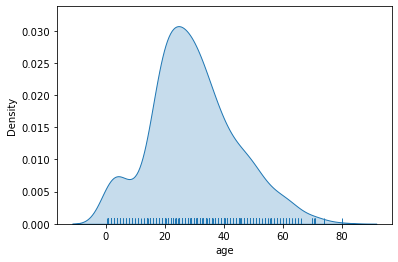

In [33]:
# kdeplot, rugplot

sns.kdeplot(data=df, x="age", shade=True)
sns.rugplot(data=df, x="age")

<AxesSubplot:xlabel='fare'>

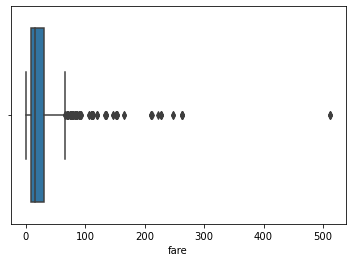

In [35]:
# boxplot
# fare의 경우 outlier가 굉장히 많이 존재함

sns.boxplot(data=df, x="fare")

## 2개 이상의 수치형 변수에 대한 시각화

<AxesSubplot:xlabel='age', ylabel='fare'>

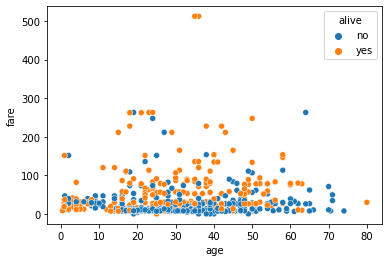

In [40]:
# age에 따라 fare는 큰 상관관계가 없어 보임

sns.scatterplot(data=df, x="age", y="fare", hue="alive")

In [44]:
# 실제로 상관계수를 구해보면 0.1로 매우 낮음

df[["age", "fare"]].corr()

,age,fare
age,1.000000,0.096067
fare,0.096067,1.000000


In [46]:
# 살아남았는지에 여부에 따라서도 나눠봤지만, age와 fare의 특별한 상관관계를 찾지 못함

df.groupby("alive")[["age", "fare"]].corr()

age      fare
alive                         
no    age   1.000000  0.076852
      fare  0.076852  1.000000
yes   age   1.000000  0.162648
      fare  0.162648  1.000000

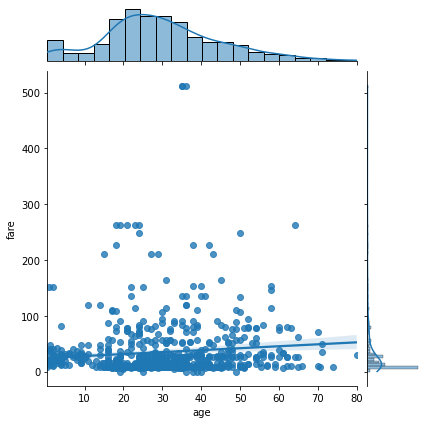

In [50]:
# jointplot
# kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

sns.jointplot(data=df, x="age", y="fare", kind="reg")

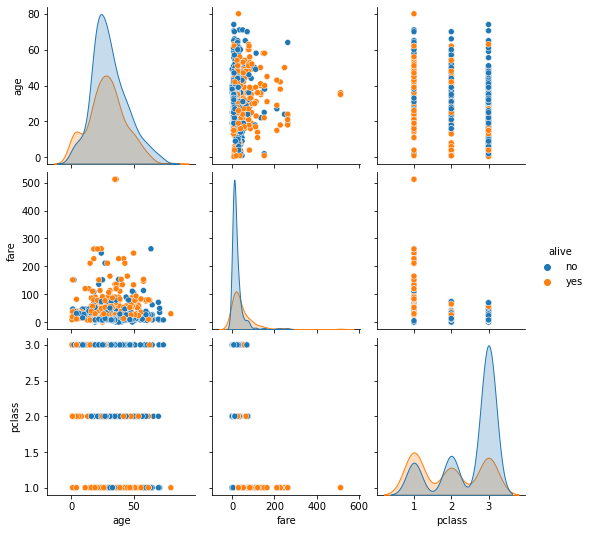

In [54]:
# pairplot

sns.pairplot(data=df[["age", "fare", "pclass", "alive"]], hue="alive")